# Project 3- David Martinez

### Scientific Question: Will the PolA gene of different bacterial species have identical amino acid and nucleotide sequences?

PolA is a highly conserved bacterial gene that encodes DNA Polymerase I. Bacterial species are usually distinguished using 16s rRNA sequencing to separate bacteria into species, although other genes, like PolA, are also sometimes used. Because of their highly conserved nature however, sequencing these genes and using them to construct phylogenies may sometimes result in two seperate bacteria being classified as a single species. Additionally, the degenerative nature of the genetic code can result in different trees depending if they are based on nucleotide sequences or amino acid sequences. Usually, DNA sequences are used to construct dendrograms that show different species and amino acid sequences are used to construct dendrograms that show similarity between proteins.

DNA sequences for PolA genes were taken from NCBI as FASTA files (https://www.ncbi.nlm.nih.gov/gene/). Amino acid sequences of PolA genes were obtained by converting the DNA sequences into AA sequences using: https://www.bioinformatics.org/sms2/translate.html. 

### Hypothesis:The bacteria will have highly similar nucleotide and amino acid sequences for the PolA gene with amino acid sequences being more similar than the nucleotide sequences.

The genetic code is redundant-it is possible for different codons to code for the same amino acid. This fact means that DNA sequences that are not identical can still produce an identical protein. Because the PolA gene is essential for life, we would expect that the amino acid sequences for DNA Polymerase I would be very similar and that they would be more similar than the DNA sequences that code for them.

To attempt to answer my scientific question and test my hypothesis, I first obtained the DNA sequences of 13 bacteria for the PolA gene. I obtained the amino acid FASTA files by converting the DNA into amino acids using https://www.bioinformatics.org/sms2/translate.html and then converted the result into a FASTA file using ALTER (http://www.sing-group.org/ALTER/).

### Part 1: Load Packages
Packages Loaded:

Bio- (Biopython) a set of tools for bioinformatics work

AlignIO- tool for multiple sequence alignment in biopython

SeqIO- tool for sequence analysis in biopython

Phylo- tool for phylogenetic tree generation and manipulation in biopython

matplotlib- allows for data visualization and graph/chart making

os- allows for the use of the operating system

In [1]:
#import all packages
from Bio import AlignIO
from Bio import SeqIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import matplotlib
import matplotlib.pyplot as plt
import os

### Part 2: Load in the data & perfrom bioinformatics analysis

In [2]:
#load in DNA sequence FASTA files and assign names to them
#FASTA files were taken from NCBI results of searches for "PolA"
s1= SeqIO.read("Escherichia_coli.fasta", "fasta")
s2= SeqIO.read("Escherichia_albertii.fasta", "fasta")
s3= SeqIO.read("Escherichia_fergusonii.fasta", "fasta")
s4= SeqIO.read("Salmonella_enterica.fasta", "fasta")
s5= SeqIO.read("Salmonella_bongori.fasta", "fasta")
s6= SeqIO.read("Streptomyces_californicus.fasta", "fasta")
s7= SeqIO.read("Streptomyces_griseus.fasta", "fasta")
s8= SeqIO.read("Yersinia_pestis.fasta", "fasta")
s9= SeqIO.read("Yersinia_rohdei.fasta", "fasta")
s10= SeqIO.read("Enterobacter_cancerogenus.fasta", "fasta")
s11= SeqIO.read("Enterobacter_cloacae.fasta", "fasta")
s12= SeqIO.read("Borrelia_garinii.fasta", "fasta")
s13= SeqIO.read("Glaesserella_parasuis.fasta", "fasta")

s1.id= "Escherichia_coli"
s2.id= "Escherichia_albertii"
s3.id= "Escherichia_fergusonii"
s4.id= "Salmonella_enterica"
s5.id= "Salmonella_bongori"
s6.id= "Streptomyces_californicus"
s7.id= "Streptomyces_griseus"
s8.id= "Yersinia_pestis"
s9.id= "Yersinia_rohdei"
s10.id= "Enterobacter_cancerogenus"
s11.id= "Enterobacter_cloacae"
s12.id= "Borrelia_garinii"
s13.id= "Glaesserella_parasuis"

In [4]:
#collate DNA sequences in a single FASTA file
bacteria_DNA= SeqIO.write([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13], "bacteria_DNA.fasta", "fasta")
cline= ClustalwCommandline("clustalw2", infile= "bacteria_DNA.fasta")
print(cline)

clustalw2 -infile=bacteria_DNA.fasta


In [5]:
clustalw_exe= r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline= ClustalwCommandline(clustalw_exe, infile= "bacteria_DNA.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr= clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=bacteria_DNA.fasta


In [ ]:
 #collated FASTA file is saved as "bacteria_DNA.fasta"

In [7]:
#align sequences in FASTA file using AlignIO
ClustalAlign= AlignIO.read("bacteria_DNA.aln", "clustal")
print(ClustalAlign)
#alignment is printed

Alignment with 13 rows and 2934 columns
GTGGCTGAGACGGCATCGAAGAAGACGGCAGACAACCGACCGCG...TGA Streptomyces_californicus
GTGGCTGAGACGGCATCGAAGAACACGGCAGACAACCGACCGCG...TGA Streptomyces_griseus
---------------ATGGTTCAGATCCCCCAAAATCCAC----...TAA Escherichia_coli
---------------ATGGTTCAGATCCCGCAAAATCCCC----...TAA Escherichia_fergusonii
---------------ATGGTTCAGATCCCCCAAAACCCAC----...TAA Escherichia_albertii
---------------ATGGTTCAGATCCCAGAAAACCCTC----...TAA Enterobacter_cancerogenus
---------------ATGGTTCAGATCCCAGAAAACCCTC----...TAA Enterobacter_cloacae
-CAGGCACGGACATTATGGTTCAGATCCCAGAAAACCCAC----...TAA Salmonella_enterica
---------------ATGGTTCAGATCCCAGAAAACCCAC----...TAA Salmonella_bongori
---------------ATGGCTCAGATTGCAGAAAACCCAT----...TAG Yersinia_pestis
---------------ATGGCCCAGATTGCAGAAAACCCAT----...TAG Yersinia_rohdei
---------------ATGGCAACAATCGCACAAAATCCGC----...TGA Glaesserella_parasuis
---------------------------ATGAAAGAACTTTACCT...TAA Borrelia_garinii


In [ ]:
#load in protein sequences FASTA files and assign names to them
p1= SeqIO.read("Escherichia_coli_protein.fas", "fasta")
p2= SeqIO.read("Escherichia_albertii_protein.fas", "fasta")
p3= SeqIO.read("Escherichia_fergusonii_protein.fas", "fasta")
p4= SeqIO.read("Salmonella_enterica_protein.fas", "fasta")
p5= SeqIO.read("Salmonella_bongori_protein.fas", "fasta")
p6= SeqIO.read("Streptomyces_californicus_protein.fas", "fasta")
p7= SeqIO.read("Streptomyces_griseus_protein.fas", "fasta")
p8= SeqIO.read("Yersinia_pestis_protein.fas", "fasta")
p9= SeqIO.read("Yersinia_rohdei_protein.fas", "fasta")
p10= SeqIO.read("Enterobacter_cancerogenus_protein.fas", "fasta")
p11= SeqIO.read("Enterobacter_cloacae_protein.fas", "fasta")
p12= SeqIO.read("Borrelia_garinii_protein.fas", "fasta")
p13= SeqIO.read("Glaesserella_parasuis_protein.fas", "fasta")

p1.id= "Escherichia_coli"
p2.id= "Escherichia_albertii"
p3.id= "Escherichia_fergusonii"
p4.id= "Salmonella_enterica"
p5.id= "Salmonella_bongori"
p6.id= "Streptomyces_californicus"
p7.id= "Streptomyces_griseus"
p8.id= "Yersinia_pestis"
p9.id= "Yersinia_rohdei"
p10.id= "Enterobacter_cancerogenus"
p11.id= "Enterobacter_cloacae"
p12.id= "Borrelia_garinii"
p13.id= "Glaesserella_parasuis"

In [ ]:
#collate into a single FASTA file containing all protein sequences
bacteria_protein= SeqIO.write([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13], "bacteria_protein.fasta", "fasta")
cline= ClustalwCommandline("clustalw2", infile= "bacteria_protein.fasta")
print(cline)

In [ ]:
#collated FASTA file is saved as "bacteria_protein.fasta"

In [30]:
#align sequences in FASTA file using AlignIO
clustalw_exe= r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline= ClustalwCommandline(clustalw_exe, infile= "bacteria_protein.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr= clustalw_cline()
print(clustalw_cline)

ClustalAlign= AlignIO.read("bacteria_protein.aln", "clustal")
print(ClustalAlign)
#alignment is printed

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=bacteria_protein.fasta
Alignment with 13 rows and 980 columns
-----MVQIPQNP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Escherichia_coli
-----MVQIPQNP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Escherichia_fergusonii
-----MVQIPQNP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Escherichia_albertii
-----MVQIPENP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Salmonella_bongori
-----MVQIPENP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Enterobacter_cancerogenus
-----MVQIPENP--LILVDGSSYLYRAYHAFP--PLTNSAGEP...--- Enterobacter_cloacae
-----MAQIAENP--LLLVDGSSYLYRAYHAFP--PLTNGSGEP...--- Yersinia_pestis
-----MAQIAENP--LILVDGSSYLYRAYHAFP--PLTNGSGEP...--- Yersinia_rohdei
-----MATIAQNP--LVLVDGSSYLYRAFHAFP--PLTNKQGEP...--- Glaesserella_parasuis
VAETASKKTADNRPRLLLMDGHSLAYRAFFALPAENFTTAVGQP...--- Streptomyces_californicus
VAETASKNTADNRPRLLLMDGHSLAYRAFFALPAENFTTAVGQP...--- Streptomyces_griseus
------------MKELYLIDALNIIFRNYHVLKNYPLLNTQGEN...--- Borrelia_garinii
-----------QARTLWFRSQKTH

### Part 3: Create a dendrogram from DNA and amino acid sequences of PolA

In [8]:
#calculate distances sequences are from each other- gives distance values for the eventual dendrogram
with open("bacteria_DNA.aln", "r") as aln:
    alignment= AlignIO.read(aln, "clustal")
print(type(alignment))

from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator= DistanceCalculator("identity")

distance_matrix= calculator.get_distance(alignment)
print(distance_matrix)

<class 'Bio.Align.MultipleSeqAlignment'>
Streptomyces_californicus	0
Streptomyces_griseus	0.06169052488070892	0
Escherichia_coli	0.5085207907293796	0.5102249488752556	0
Escherichia_fergusonii	0.5078391274710293	0.5074982958418541	0.035446489434219464	0
Escherichia_albertii	0.5064758009543285	0.5071574642126789	0.09713701431492838	0.10122699386503065	0
Enterobacter_cancerogenus	0.4979550102249489	0.5003408316291752	0.1915473755964554	0.19291070211315609	0.2027948193592365	0
Enterobacter_cloacae	0.5037491479209271	0.5040899795501023	0.19972733469665982	0.19972733469665982	0.19563735514655756	0.13565098841172463	0
Salmonella_enterica	0.49488752556237214	0.5010224948875255	0.18234492160872529	0.18234492160872529	0.18234492160872529	0.2031356509884117	0.1915473755964554	0
Salmonella_bongori	0.4993183367416496	0.5054533060668029	0.17450579413769596	0.17961826857532381	0.1813224267211997	0.19836400817995914	0.19461486025903207	0.09100204498977504	0
Yersinia_pestis	0.5354464894342195	0.5378323

Tree(rooted=True)
    Clade(branch_length=0, name='Inner11')
        Clade(branch_length=0.002096619897959149, name='Escherichia_coli')
        Clade(branch_length=0.003005420918367332, name='Escherichia_fergusonii')
        Clade(branch_length=0.009207589285714291, name='Inner10')
            Clade(branch_length=0.018120216836734725, name='Inner9')
                Clade(branch_length=0.014519557823129234, name='Inner8')
                    Clade(branch_length=0.06059470663265308, name='Inner6')
                        Clade(branch_length=0.06578443877551025, name='Inner5')
                            Clade(branch_length=0.11389395043731779, name='Inner3')
                                Clade(branch_length=0.02535430839002273, name='Inner2')
                                    Clade(branch_length=0.5651275510204082, name='Salmonella_enterica')
                                    Clade(branch_length=0.3246683673469387, name='Borrelia_garinii')
                                Clade(bran

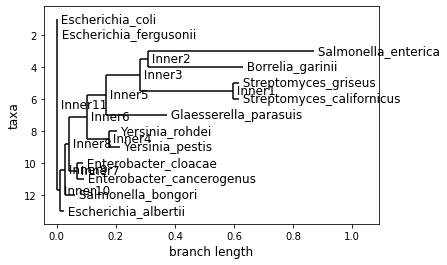

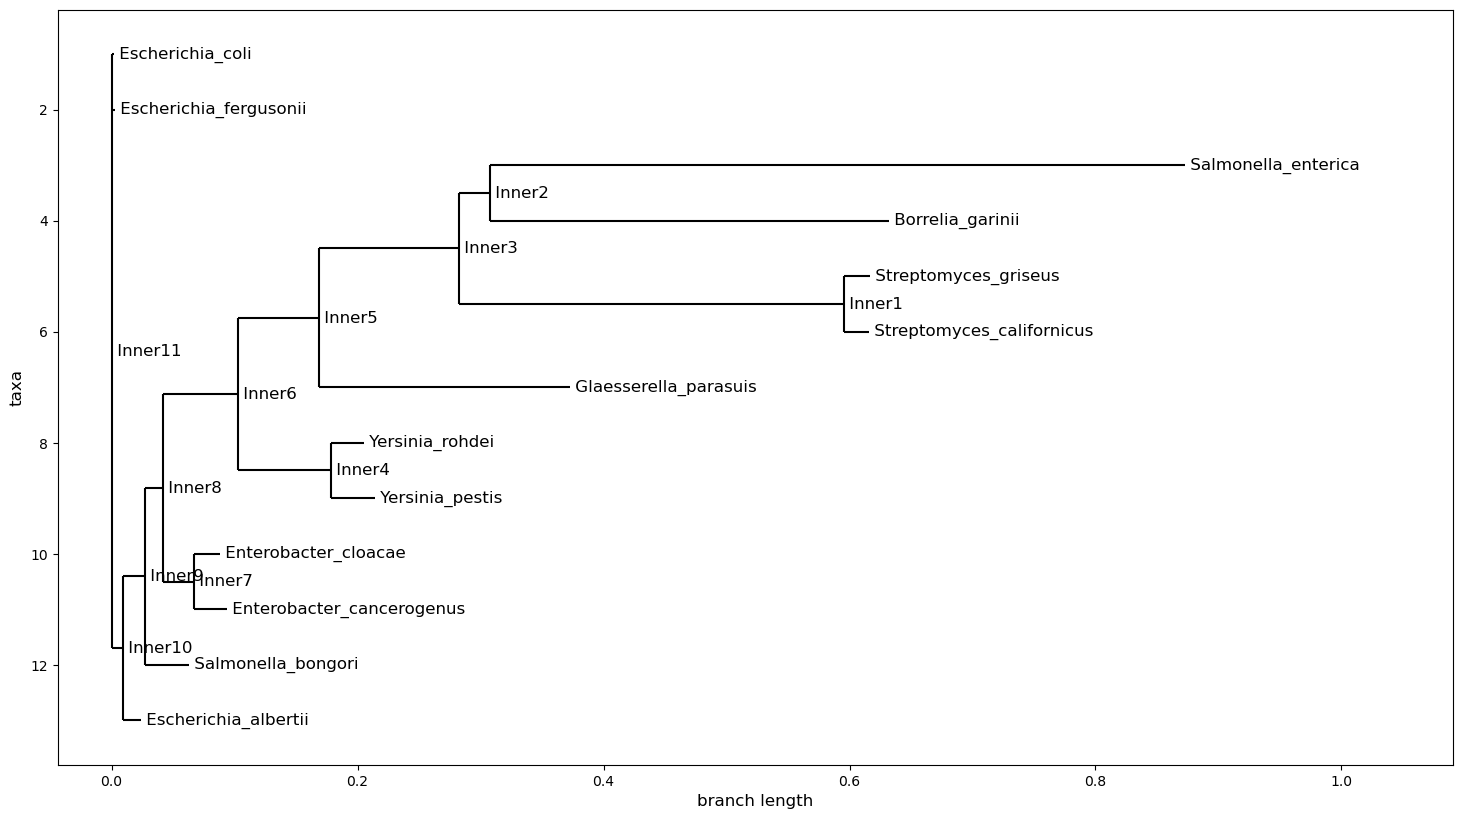

In [33]:
#constructing the dendrogram
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor= DistanceTreeConstructor(calculator)

bacteria_DNA_tree= constructor.build_tree(alignment)
bacteria_DNA_tree.rooted= True
print(bacteria_DNA_tree)

Phylo.write(bacteria_DNA_tree, "bacteria_DNA_tree.xml", "phyloxml")

fig= Phylo.draw(bacteria_DNA_tree)

#enlarging the tree to make it clearer
fig=plt.figure(figsize=(18,10), dpi=100) #create figure and set the size
matplotlib.rc('font', size=12) #fontsize of leaf and node labels
matplotlib.rc('xtick', labelsize=10) #fontsize of x tick labels
matplotlib.rc('ytick', labelsize=10)  #fontsize of y tick labels


axes=fig.add_subplot(1,1,1)
Phylo.draw(bacteria_DNA_tree, axes=axes)
fig.savefig("bacteria_DNA_cladogram")

In [15]:
#figure is saved as "bacteria_DNA_cladogram"


In [31]:
#calculate distances sequences are from each other- gives distance values for the eventual dendrogram
with open("bacteria_protein.aln", "r") as aln:
    alignment= AlignIO.read(aln, "clustal")
print(type(alignment))

from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator= DistanceCalculator("identity")

distance_matrix= calculator.get_distance(alignment)
print(distance_matrix)

<class 'Bio.Align.MultipleSeqAlignment'>
Escherichia_coli	0
Escherichia_fergusonii	0.005102040816326481	0
Escherichia_albertii	0.025510204081632626	0.026530612244897944	0
Salmonella_bongori	0.06428571428571428	0.06632653061224492	0.06734693877551023	0
Enterobacter_cancerogenus	0.09795918367346934	0.09693877551020413	0.09795918367346934	0.1010204081632653	0
Enterobacter_cloacae	0.09183673469387754	0.09387755102040818	0.09285714285714286	0.08877551020408159	0.04693877551020409	0
Yersinia_pestis	0.21836734693877546	0.21632653061224494	0.22142857142857142	0.2316326530612245	0.21530612244897962	0.21938775510204078	0
Yersinia_rohdei	0.20510204081632655	0.2020408163265306	0.2081632653061225	0.22244897959183674	0.2081632653061225	0.21020408163265303	0.06224489795918364	0
Glaesserella_parasuis	0.36734693877551017	0.36734693877551017	0.37755102040816324	0.37857142857142856	0.3918367346938776	0.3806122448979592	0.3816326530612245	0.37755102040816324	0
Streptomyces_californicus	0.6193877551020408	

Tree(rooted=True)
    Clade(branch_length=0, name='Inner11')
        Clade(branch_length=0.002096619897959149, name='Escherichia_coli')
        Clade(branch_length=0.003005420918367332, name='Escherichia_fergusonii')
        Clade(branch_length=0.009207589285714291, name='Inner10')
            Clade(branch_length=0.018120216836734725, name='Inner9')
                Clade(branch_length=0.014519557823129234, name='Inner8')
                    Clade(branch_length=0.06059470663265308, name='Inner6')
                        Clade(branch_length=0.06578443877551025, name='Inner5')
                            Clade(branch_length=0.11389395043731779, name='Inner3')
                                Clade(branch_length=0.02535430839002273, name='Inner2')
                                    Clade(branch_length=0.5651275510204082, name='Salmonella_enterica')
                                    Clade(branch_length=0.3246683673469387, name='Borrelia_garinii')
                                Clade(bran

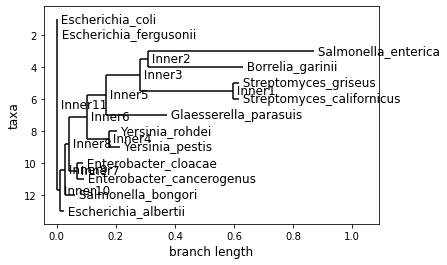

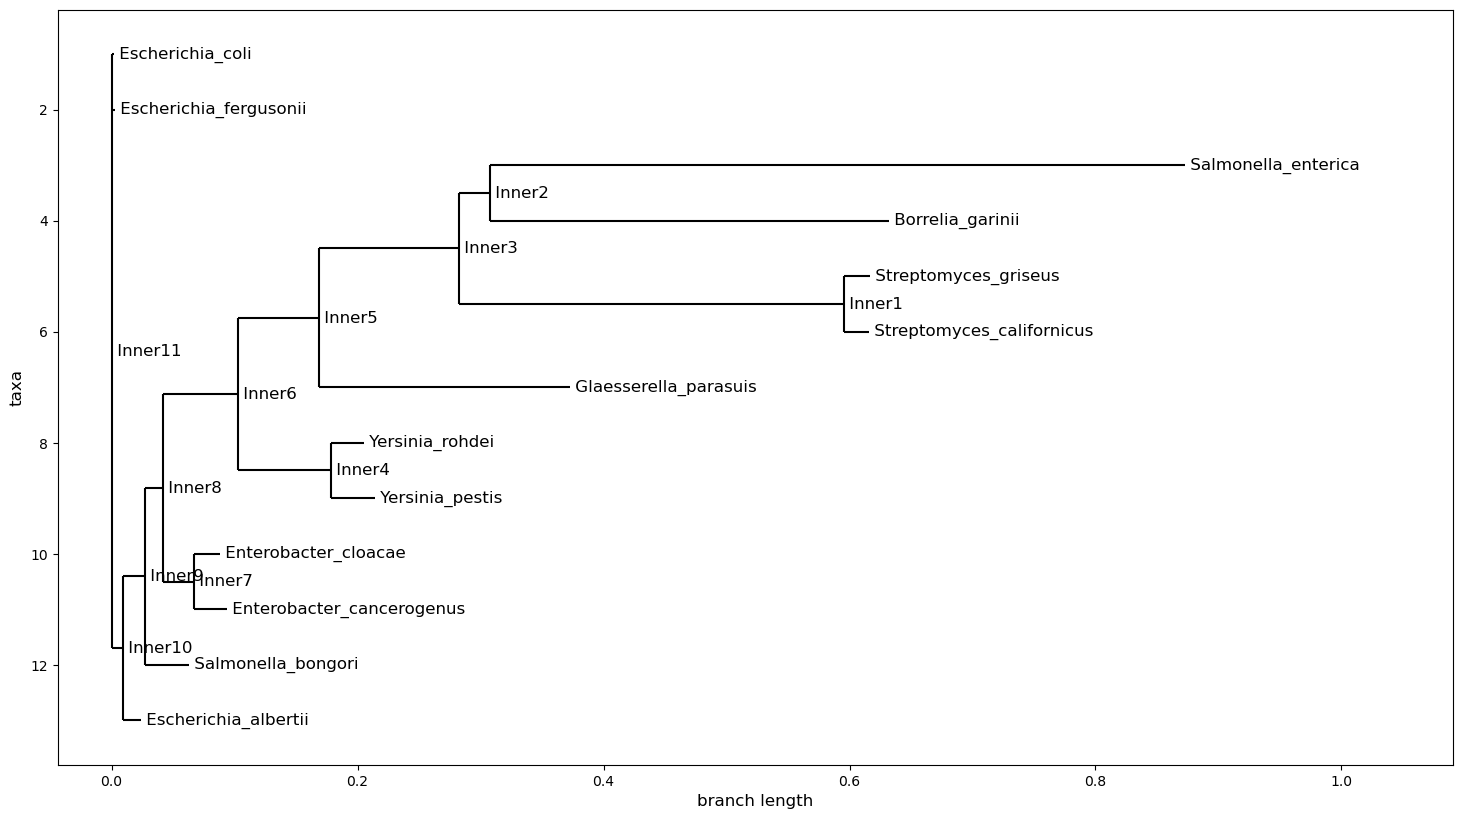

In [32]:
#constructing the dendrogram
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor= DistanceTreeConstructor(calculator)

bacteria_protein_tree= constructor.build_tree(alignment)
bacteria_protein_tree.rooted= True
print(bacteria_protein_tree)

Phylo.write(bacteria_protein_tree, "bacteria_protein_tree.xml", "phyloxml")

fig= Phylo.draw(bacteria_protein_tree)

#enlarging the tree to make it clearer
fig=plt.figure(figsize=(18,10), dpi=100) #create figure and set the size
matplotlib.rc('font', size=12) #fontsize of leaf and node labels
matplotlib.rc('xtick', labelsize=10) #fontsize of x tick labels
matplotlib.rc('ytick', labelsize=10)  #fontsize of y tick labels


axes=fig.add_subplot(1,1,1)
Phylo.draw(bacteria_protein_tree, axes=axes)
fig.savefig("bacteria_protein_cladogram")

In [27]:
#figure is saved as "bacteria_protein_dendrogram"

### Part4: Analysis of the Results
The two dendrograms created show the similarity between DNA and amino acid sequences of the PolA gene of the chosen bacteria. Sequences closer in similarity are located closer together in the dendrograms. A comparison of the two trees reveals that the relationships between the bacteria are identical for both the DNA sequence of PolA and the amino acid sequence of DNA Polymerase I. This would indicate that my hypothesis was incorrect as the two dendrograms are identical. However, because the PolA gene is highly conserved, analysis of other genes may show that their DNA sequences are more dissimilar than their amino acid sequences.